# Clase 55 - Datathon - Predicción de Inmuebles  
## Equipo Helton

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")

### 1. Lectura de la base de datos

In [2]:
df_train = pd.read_csv('D:/CODER/Data Science/Datathon/Train/train.csv')
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
df_train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
cantidad_na = df_train.isna().sum()

tabla_na = pd.DataFrame ({'Columna': cantidad_na.index, 'Cantidad NaN': cantidad_na.values})
tabla_na = tabla_na[tabla_na['Cantidad NaN'] > 0 ]
tabla_na

,Columna,Cantidad NaN
3,LotFrontage,259
6,Alley,1369
25,MasVnrType,8
26,MasVnrArea,8
30,BsmtQual,37
31,BsmtCond,37
32,BsmtExposure,38
33,BsmtFinType1,37
35,BsmtFinType2,38
42,Electrical,1


#### Con ayuda de data_description.txt determinaremos si estas columnas tienen valor para la predicción

In [6]:
df_train.shape #Primero eliminaremos las columnas que tienen muchos NaN como Alley o PoolQC

(1460, 81)

In [7]:
df_train.LotFrontage # Me interesó esta columna y quiero ver si es relevante para predecir la variable objetivo  

0       65.0
1       80.0
2       68.0
3       60.0
4       84.0
        ... 
1455    62.0
1456    85.0
1457    66.0
1458    68.0
1459    75.0
Name: LotFrontage, Length: 1460, dtype: float64

Text(0.5, 1.0, 'Histograma de LotFrontage')

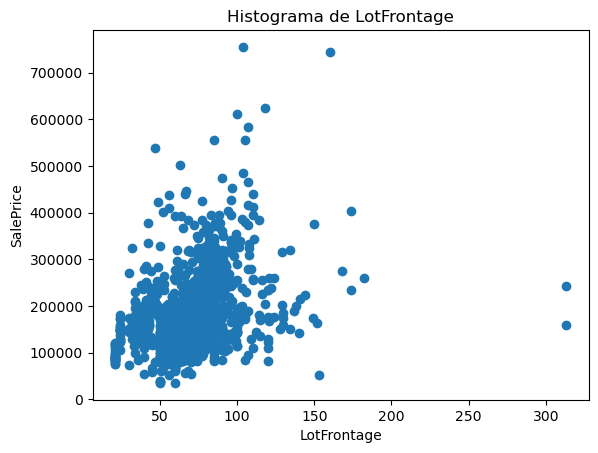

In [8]:
plt.scatter(df_train.LotFrontage, df_train.SalePrice)
plt.xlabel('LotFrontage')
plt.ylabel('SalePrice')
plt.title('Histograma de LotFrontage')

> Veo que existen muchos outliers y voy a intentar eliminarlos para ver la correlación con mayor precisión

In [9]:
columna = 'LotFrontage'

# Calcular el rango intercuartílico (IQR)
Q1 = df_train[columna].quantile(0.25)
Q3 = df_train[columna].quantile(0.75)
IQR = Q3 - Q1

# Definir el rango para identificar outliers
umbral_inferior = Q1 - 1.5 * IQR
umbral_superior = Q3 + 1.5 * IQR

# Filtrar los datos sin outliers
df_train_filtrado = df_train[(df_train[columna] >= umbral_inferior) & (df_train[columna] <= umbral_superior)]

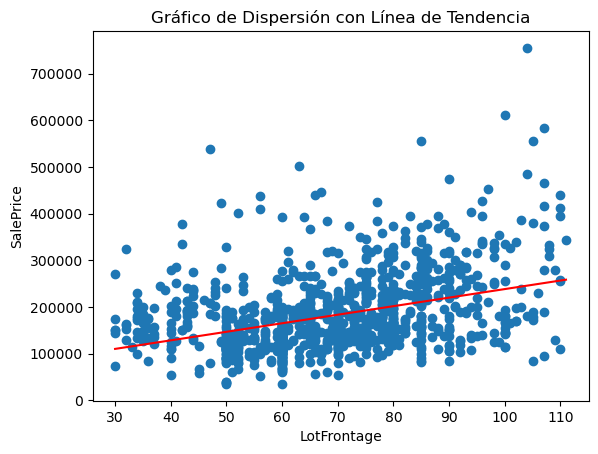

In [10]:
x = df_train_filtrado['LotFrontage']
y = df_train_filtrado['SalePrice']

# Crear el gráfico de dispersión
plt.scatter(x, y)

# Ajustar una línea de regresión lineal utilizando polyfit()
coefficients = np.polyfit(x, y, 1)
p = np.poly1d(coefficients)

# Generar los valores para la línea de tendencia
x_line = np.linspace(x.min(), x.max(), 1460)
y_line = p(x_line)

# Trazar la línea de tendencia en el gráfico
plt.plot(x_line, y_line, color='red')

# Agregar etiquetas y título
plt.xlabel('LotFrontage')
plt.ylabel('SalePrice')
plt.title('Gráfico de Dispersión con Línea de Tendencia')

# Mostrar el gráfico
plt.show()


Podemos ver que hay una relación entre la cantidad de LotFrontage y la variable objetivo. No es lo suficientemente grande como para ser descartada así que me gustaría hacer el tratamiento de sus NaN. 

In [11]:
mediana = df_train.LotFrontage.median() 
columna = df_train["LotFrontage"] #agregamos la mediana a la columna LotFrontage
columna.fillna(mediana, inplace=True)
columna.isna().sum() 


0

##### Mediante un mapa de correlación quiero ver si hay más variables con NaN que valga la pena mantener

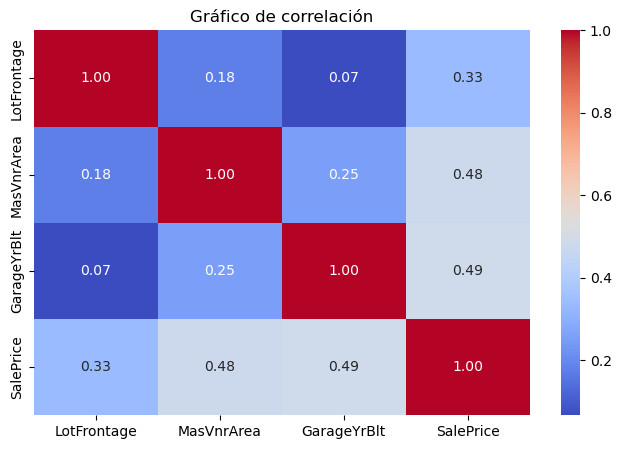

In [12]:
columnas = (tabla_na.Columna.values).tolist()
columnas.append('SalePrice')
df_correlacion = df_train[columnas]
# Calcular la matriz de correlación
correlation_matrix = df_correlacion.corr(numeric_only=True)

# Crear el gráfico de correlación
plt.figure(figsize=(8, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Gráfico de correlación')

# Mostrar el gráfico
plt.show()


In [13]:
columnas = ["MasVnrType", "BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1", 
 "BsmtFinType2", "Electrical", "GarageType", "GarageFinish", "GarageQual", "GarageCond"]

In [14]:
df_categorizado = df_train[columnas]

In [15]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

label_encoders = {}  # Definir el diccionario fuera del bucle

for columna in columnas:
    label_encoder = LabelEncoder()
    encoded_values = label_encoder.fit_transform(df_categorizado[columna])
    df_categorizado[columna + "_encoded"] = encoded_values
    label_encoders[columna] = label_encoder
    df_categorizado.drop(columna, axis=1, inplace=True)  # Eliminar la columna original

# Mostrar las columnas codificadas en el DataFrame
df_categorizado.head()

,MasVnrType_encoded,BsmtQual_encoded,BsmtCond_encoded,BsmtExposure_encoded,BsmtFinType1_encoded,BsmtFinType2_encoded,Electrical_encoded,GarageType_encoded,GarageFinish_encoded,GarageQual_encoded,GarageCond_encoded
0,1,2,3,3,2,5,4,1,1,4,4
1,2,2,3,1,0,5,4,1,1,4,4
2,1,2,3,2,2,5,4,1,1,4,4
3,2,3,1,3,0,5,4,5,2,4,4
4,1,2,3,0,2,5,4,1,1,4,4


In [16]:
df_categorizado["SalePrice"] = df_train["SalePrice"]

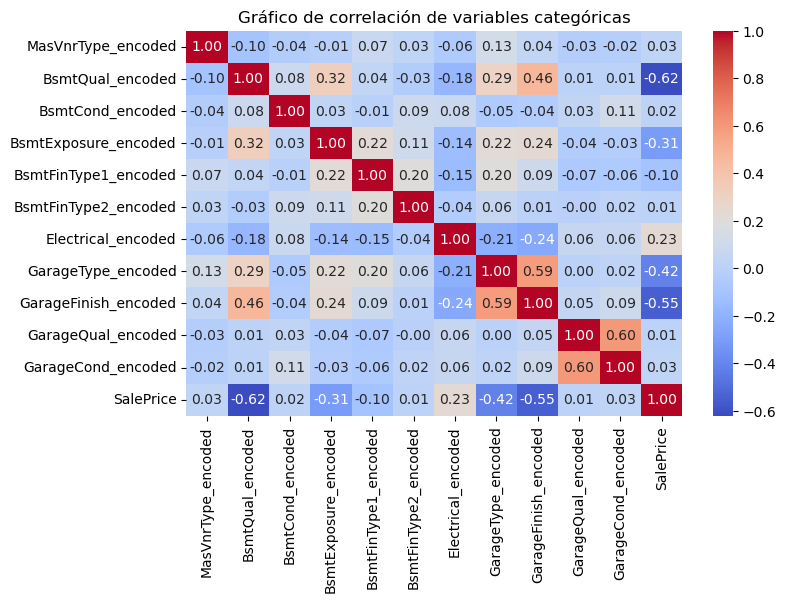

In [17]:
# Calcular la matriz de correlación
correlation_matrix = df_categorizado.corr(numeric_only=True)

# Crear el gráfico de correlación
plt.figure(figsize=(8, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Gráfico de correlación de variables categóricas')

# Mostrar el gráfico
plt.show()

In [18]:
df_train.BsmtQual
df_train["BsmtQual"] = df_train["BsmtQual"].fillna("No basement")


In [19]:
x=df_train.BsmtQual.unique()
df_train.BsmtQual.value_counts()

TA             649
Gd             618
Ex             121
No basement     37
Fa              35
Name: BsmtQual, dtype: int64

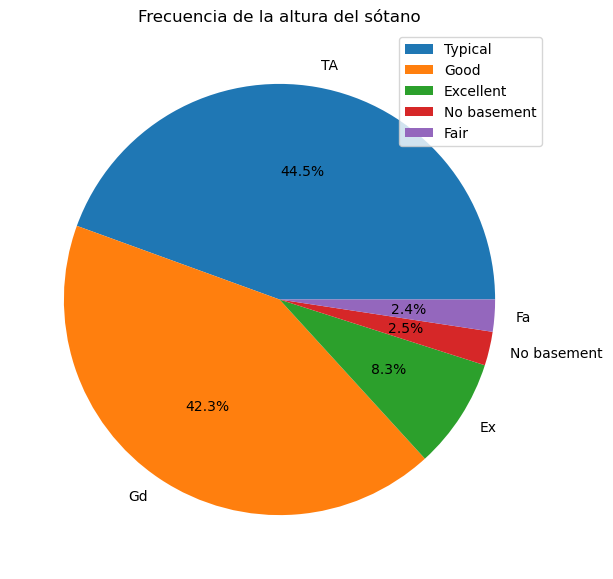

In [20]:
import matplotlib.pyplot as plt

# Obtener los valores de conteo de la columna 'BsmtQual'
counts = df_train['BsmtQual'].value_counts()

# Graficar el pastel
fig,ax = plt.subplots(figsize=(7,7))
plt.pie(counts, labels=counts.index, autopct='%1.1f%%')
plt.title("Frecuencia de la altura del sótano")
labels = ['Typical', 'Good', 'Excellent', 'No basement', 'Fair']
plt.legend(labels)
# Mostrar el gráfico
plt.show()

In [21]:
grupo = df_train.groupby('BsmtQual')['SalePrice'].mean()
grupo_ordenado = round(grupo.sort_values(ascending=False))
grupo_ordenado

BsmtQual
Ex             327041.0
Gd             202688.0
TA             140760.0
Fa             115692.0
No basement    105653.0
Name: SalePrice, dtype: float64

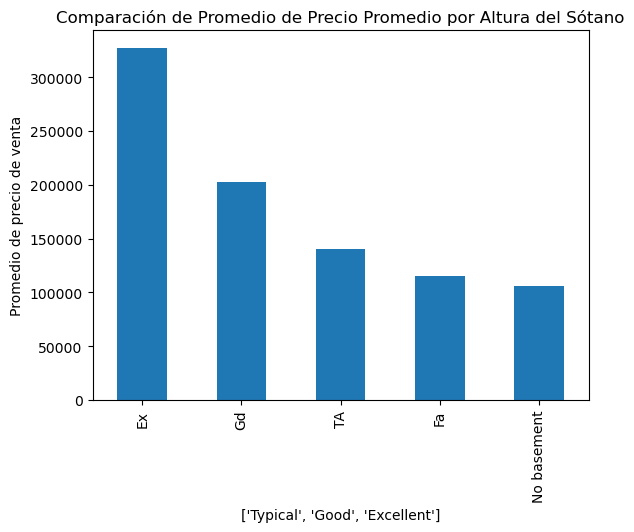

In [22]:
grupo_ordenado.plot(kind='bar')
plt.xlabel(labels[0:3])
plt.ylabel('Promedio de precio de venta')
plt.title('Comparación de Promedio de Precio Promedio por Altura del Sótano')
plt.show()


La conclusión que puedo tomar con esta variable categórica con alta relación con la variable objetivo es que puede ayudar a un algoritmo de regresión logística ya que a mayor altura de sótano mayor es el precio de la propiedad. Sin embargo, es posible que esta variable sobreentrene al algoritmo. 

In [23]:
df_train.GarageFinish
df_train["GarageFinish"] = df_train["GarageFinish"].fillna("No Garage")

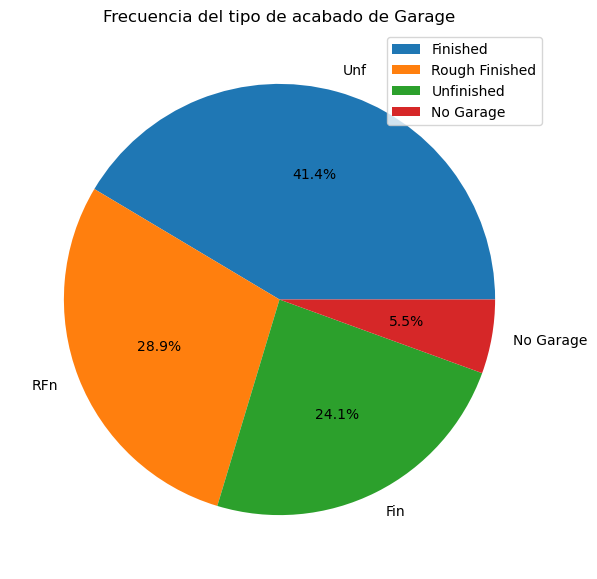

In [24]:
import matplotlib.pyplot as plt

counts = df_train['GarageFinish'].value_counts()

# Graficar el pastel
fig,ax = plt.subplots(figsize=(7,7))
plt.pie(counts, labels=counts.index, autopct='%1.1f%%')
plt.title("Frecuencia del tipo de acabado de Garage")
labels = ['Finished', 'Rough Finished', 'Unfinished', 'No Garage']
plt.legend(labels)

plt.show()

In [25]:
grupo = df_train.groupby('GarageFinish')['SalePrice'].mean()
grupo_ordenado = round(grupo.sort_values(ascending=False))
grupo_ordenado

GarageFinish
Fin          240053.0
RFn          202069.0
Unf          142156.0
No Garage    103317.0
Name: SalePrice, dtype: float64

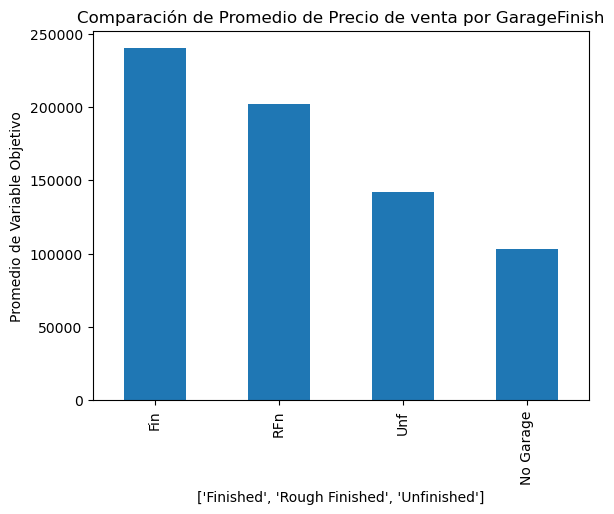

In [26]:
grupo_ordenado.plot(kind='bar')
plt.xlabel(labels[0:3])
plt.ylabel('Promedio de Variable Objetivo')
plt.title('Comparación de Promedio de Precio de venta por GarageFinish')
plt.show()


Con este gráfico también me permite concluir que también el promedio de precio de venta del apartamento puede estar muy correlacionado con el tipo de acabado del garage.

Con las conclusiones de la limpieza de datos doy comienzo a la fase de Análisis Exploratorio 

In [27]:
columnas_a_eliminar= ['Alley', 'MiscFeature', 'PoolQC', 'Fence', 'FireplaceQu', 
                      'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 
                      'Electrical', 'FireplaceQu', 'GarageType',  'GarageYrBlt',  
                      'GarageQual','GarageCond', 'PoolQC',  'Fence',  'MiscFeature']

df_train_limpio = df_train.drop(columnas_a_eliminar, axis=1)
df_train_limpio.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000


### 3. Análisis Exploratorio 

In [28]:
df_train_limpio.duplicated().sum()

0

In [29]:
grouped = df_train_limpio.groupby(['MSSubClass','MSZoning'] ).median()
grouped.head(3)

Id  LotFrontage  LotArea  OverallQual  OverallCond  \
MSSubClass MSZoning                                                          
20         C (all)   865.0         58.0   8856.0          3.5          4.0   
           FV        526.0         72.0   8640.0          7.0          5.0   
           RH        952.0         60.0   8400.0          4.0          4.0   

                     YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  \
MSSubClass MSZoning                                                    
20         C (all)      1950.5        1951.0         0.0        25.0   
           FV           2007.0        2008.0         0.0        27.0   
           RH           1965.0        1965.0         0.0       641.0   

                     BsmtFinSF2  ...  WoodDeckSF  OpenPorchSF  EnclosedPorch  \
MSSubClass MSZoning              ...                                           
20         C (all)          0.0  ...         0.0          0.0            0.0   
           FV               0.0  ...         0.0        130.0            0.0   
           RH               0.0  ...       250.0          0.0            0.0   

                     3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  \
MSSubClass MSZoning                                                      
20         C (all)         0.0          0.0       0.0     27.0     8.0   
           FV              0.0          0.0       0.0      0.0     7.0   
           RH              0.0          0.0       0.0      0.0     9.0   

                     YrSold  SalePrice  
MSSubClass MSZoning                     
20         C (all)   2008.0    45652.0  
           FV        2008.0   222000.0  
           RH        2006.0   107000.0  

[3 rows x 36 columns]

In [30]:
grouped = grouped.reset_index()
grouped.head(3)

,MSSubClass,MSZoning,Id,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,20,C (all),865.0,58.0,8856.0,3.5,4.0,1950.5,1951.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,27.0,8.0,2008.0,45652.0
1,20,FV,526.0,72.0,8640.0,7.0,5.0,2007.0,2008.0,0.0,...,0.0,130.0,0.0,0.0,0.0,0.0,0.0,7.0,2008.0,222000.0
2,20,RH,952.0,60.0,8400.0,4.0,4.0,1965.0,1965.0,0.0,...,250.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,2006.0,107000.0


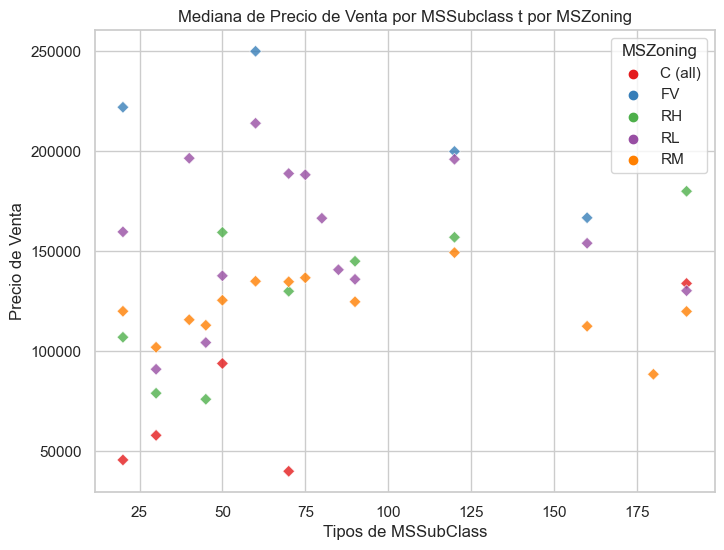

In [31]:
sns.set(style='whitegrid')

plt.figure(figsize=(8, 6))

sns.scatterplot(x=grouped['MSSubClass'],y=grouped['SalePrice'], hue=grouped['MSZoning'], marker='D', palette='Set1', alpha=0.8)

plt.xlabel('Tipos de MSSubClass')

plt.ylabel('Precio de Venta')

plt.title('Mediana de Precio de Venta por MSSubclass t por MSZoning')

plt.show()

Este gráfico nos permite entender que Tipo de MSSubClass tiene una mediana de precio de venta mayor y también para MsZoning. Nos permite ver cuáles zonas tienen mayor mediana de precios de venta y también que zonas tienen mayor cantidad de propiedades

In [32]:
df_train_limpio.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional',
       'Fireplaces', 'GarageFinish', 'GarageCars', 'GarageArea', 'PavedDrive',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SaleType',
       'SaleCondition', 'SaleP

In [33]:
grouped = df_train_limpio.groupby(['Neighborhood','MSZoning']).median(numeric_only=True)
grouped.reset_index(inplace=True)
grouped.head()

,Neighborhood,MSZoning,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,Blmngtn,RL,821.5,120.0,47.0,3189.0,7.0,5.0,2005.0,2006.0,...,143.0,20.0,0.0,0.0,0.0,0.0,0.0,5.0,2007.5,191500.0
1,Blmngtn,RM,466.0,120.0,69.0,3072.0,7.0,5.0,2004.0,2004.0,...,144.0,20.0,0.0,0.0,0.0,0.0,0.0,5.0,2006.0,178740.0
2,Blueste,RM,778.5,160.0,24.0,1625.0,6.0,6.0,1980.0,1980.0,...,155.5,0.0,0.0,0.0,0.0,0.0,0.0,6.0,2008.5,137500.0
3,BrDale,RM,578.5,160.0,21.0,1680.0,6.0,5.0,1971.0,1971.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,2008.0,106000.0
4,BrkSide,RL,649.0,50.0,60.0,7442.0,5.0,6.0,1925.5,1955.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,2008.0,128000.0


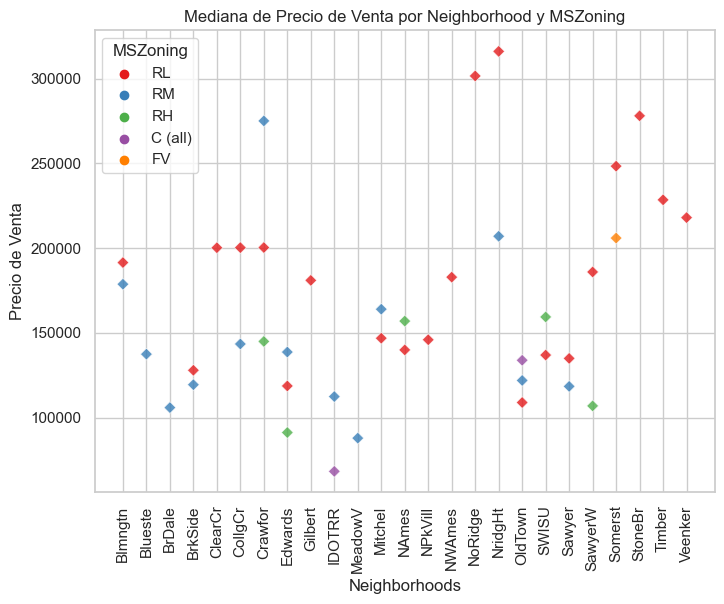

In [34]:
sns.set(style='whitegrid')

plt.figure(figsize=(8, 6))

sns.scatterplot(x= grouped['Neighborhood'], y=grouped['SalePrice'], palette='Set1', marker='D', alpha=0.8, hue=grouped['MSZoning'])

plt.xticks(rotation=90)

plt.xlabel('Neighborhoods')

plt.ylabel('Precio de Venta')

plt.title('Mediana de Precio de Venta por Neighborhood y MSZoning')

plt.show()

Text(0.5, 1.0, 'Frecuencia de Neighborhoods')

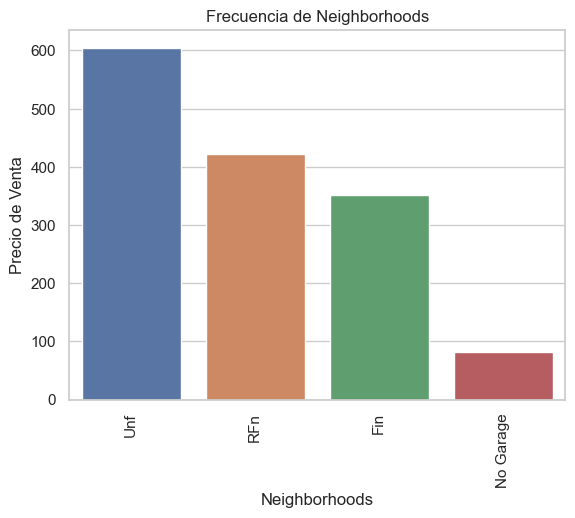

In [35]:
sns.barplot(x=counts.index, y=counts.values)
plt.xticks(rotation=90)
plt.xlabel('Neighborhoods')
plt.ylabel('Precio de Venta')
plt.title('Frecuencia de Neighborhoods')

Vemos que a pesar de que hay barrios con mayor frecuencia, esto no se ve reflejado en los valores de propiedades, es una reflexión interesante.

In [36]:
df_train.LotArea.value_counts()

7200     25
9600     24
6000     17
9000     14
8400     14
         ..
14601     1
13682     1
4058      1
17104     1
9717      1
Name: LotArea, Length: 1073, dtype: int64

Text(0.5, 1.0, 'Distribución de LotArea por Precio de Venta y MSZoning')

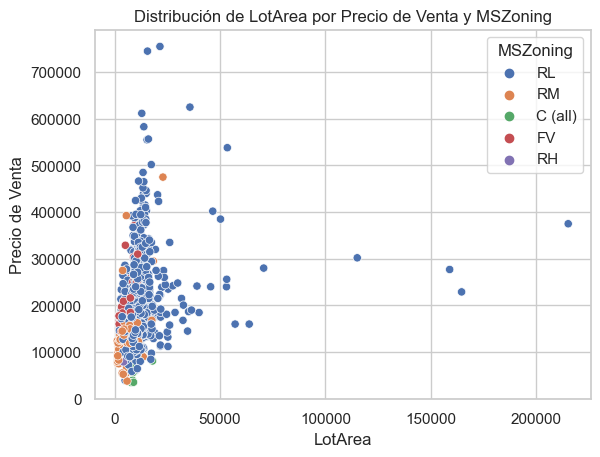

In [37]:
sns.set(style='whitegrid')
sns.scatterplot(x=df_train["LotArea"],y=df_train["SalePrice"], hue=df_train['MSZoning'])
plt.xlabel('LotArea')
plt.ylabel('Precio de Venta')
plt.title('Distribución de LotArea por Precio de Venta y MSZoning')

In [38]:
mask = np.zeros_like(df_train.corr(numeric_only=True))
triangle_indices = np.triu_indices_from(mask)
mask[triangle_indices] = True

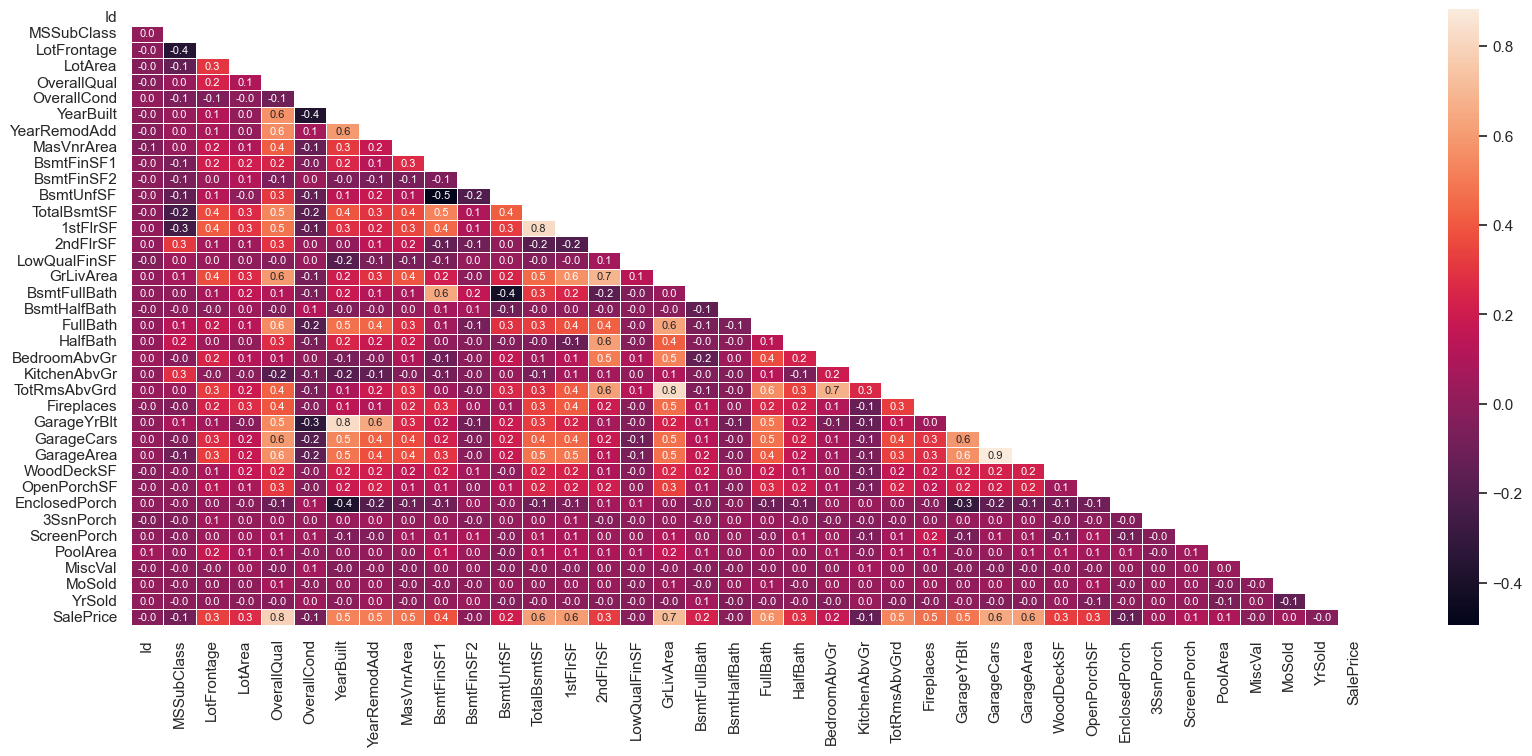

In [39]:
#código de Guido para correlación de variables númericas
f, ax = plt.subplots(figsize=(20,8))
sns.heatmap(df_train.corr(numeric_only=True), annot = True, annot_kws = {"size": 8}, mask = mask,  linewidth=0.4, fmt='.1f', ax=ax)
sns.set_style('white')
#plt.savefig('Heatmap todas.svg', dpi = 150)
plt.show()

Text(0.5, 1.0, 'Distribución de Precio de Venta por Año de Remodelación/Construcción')

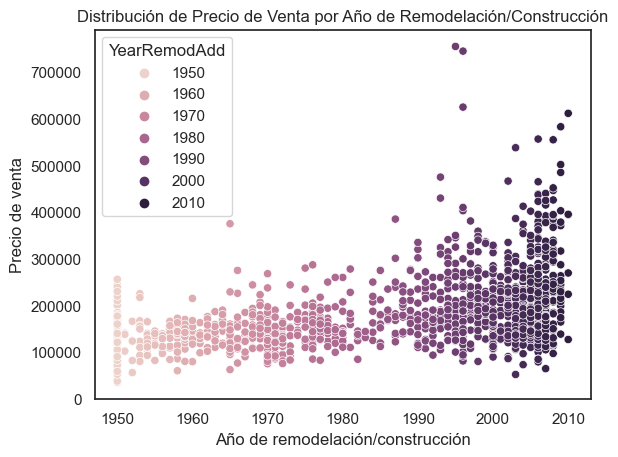

In [40]:
sns.scatterplot(x=df_train_limpio["YearRemodAdd"],y=df_train_limpio["SalePrice"], hue=df_train_limpio["YearRemodAdd"])
plt.xlabel('Año de remodelación/construcción')
plt.ylabel('Precio de venta')
plt.title('Distribución de Precio de Venta por Año de Remodelación/Construcción')

Text(0.5, 1.0, 'Distribución de Precio de Venta por Overall Quality')

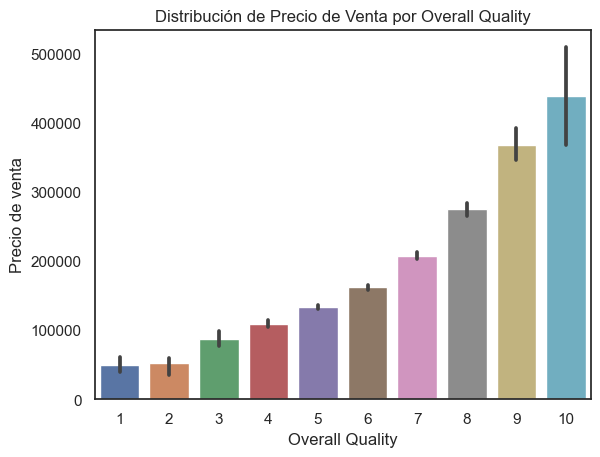

In [41]:
sns.barplot(x=df_train_limpio.OverallQual, y=df_train_limpio.SalePrice)
plt.xlabel('Overall Quality')
plt.ylabel('Precio de venta')
plt.title('Distribución de Precio de Venta por Overall Quality')

Text(0.5, 1.0, 'Distribución de Precio de Venta por tipo de Utilidades')

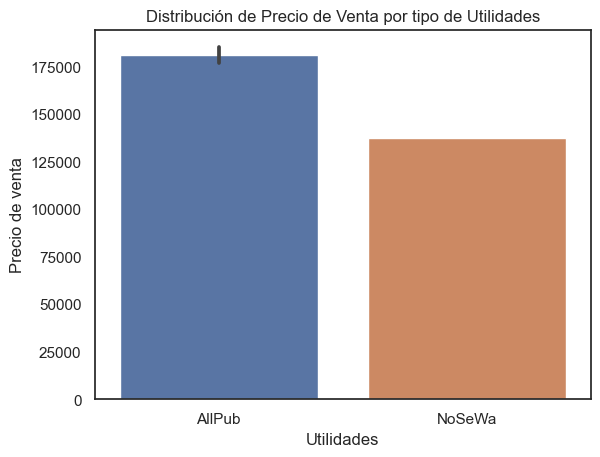

In [42]:
sns.barplot(x=df_train_limpio.Utilities, y=df_train_limpio.SalePrice)
plt.xlabel('Utilidades')
plt.ylabel('Precio de venta')
plt.title('Distribución de Precio de Venta por tipo de Utilidades')

Text(0.5, 1.0, 'Distribución de Precio de Venta por tipo de GrLivArea')

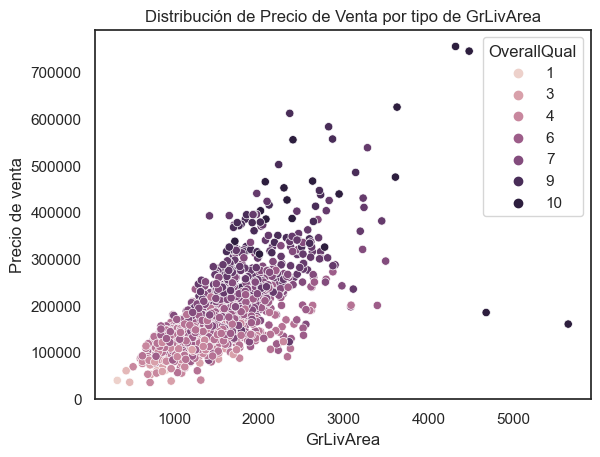

In [43]:
sns.scatterplot(x=df_train_limpio.GrLivArea, y=df_train_limpio.SalePrice, hue= df_train_limpio.OverallQual)
plt.xlabel('GrLivArea')
plt.ylabel('Precio de venta')
plt.title('Distribución de Precio de Venta por tipo de GrLivArea')

In [44]:
df_train_limpio.FullBath

0       2
1       2
2       2
3       1
4       2
       ..
1455    2
1456    2
1457    2
1458    1
1459    1
Name: FullBath, Length: 1460, dtype: int64

Text(0.5, 1.0, 'Distribución de Precio de Venta por cantidad de FullBath')

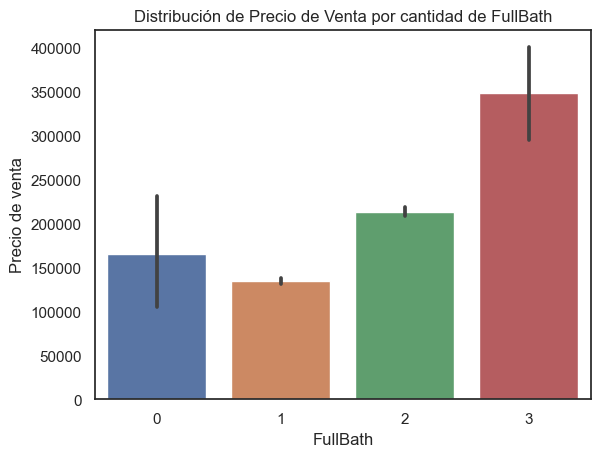

In [45]:
sns.barplot(x=df_train_limpio.FullBath, y=df_train_limpio.SalePrice)
plt.xlabel('FullBath')
plt.ylabel('Precio de venta')
plt.title('Distribución de Precio de Venta por cantidad de FullBath')

Text(0.5, 1.0, 'Frecuencia de cantidad de FullBath')

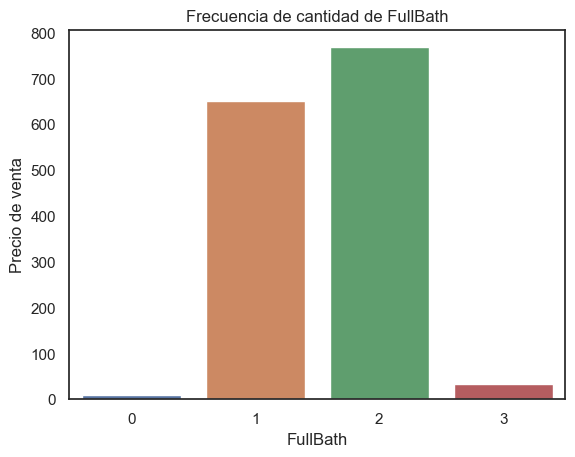

In [46]:
sns.barplot(x=df_train_limpio.FullBath.value_counts().index, y= df_train_limpio.FullBath.value_counts().values)
plt.xlabel('FullBath')
plt.ylabel('Precio de venta')
plt.title('Frecuencia de cantidad de FullBath')

In [47]:
columna = 'MasVnrArea'

# Calcular el rango intercuartílico (IQR)
Q1 = df_train[columna].quantile(0.25)
Q3 = df_train[columna].quantile(0.75)
IQR = Q3 - Q1

# Definir el rango para identificar outliers
umbral_inferior = Q1 - 1.5 * IQR
umbral_superior = Q3 + 1.5 * IQR

# Filtrar los datos sin outliers
df_train_filtrado = df_train[(df_train[columna] >= umbral_inferior) & (df_train[columna] <= umbral_superior)]

In [48]:
moda= df_train_filtrado['MasVnrArea'].mode()
df_train_filtrado['MasVnrArea']= df_train_filtrado['MasVnrArea'].fillna(moda[0])

Text(0.5, 1.0, 'Distribución de Precio de Venta por cantidad de MasVnrArea')

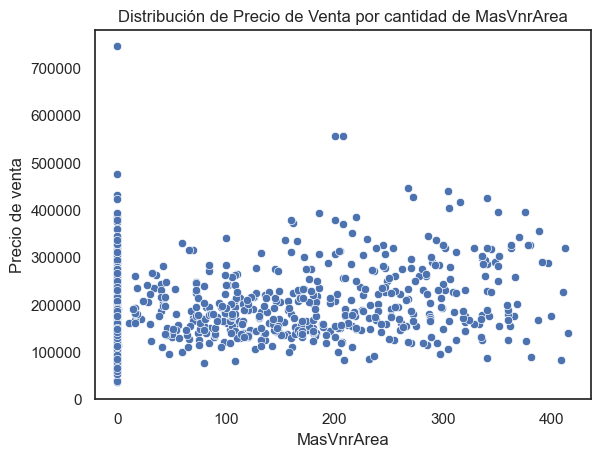

In [49]:
sns.scatterplot(x=df_train_filtrado.MasVnrArea, y=df_train_filtrado.SalePrice)
plt.xlabel('MasVnrArea')
plt.ylabel('Precio de venta')
plt.title('Distribución de Precio de Venta por cantidad de MasVnrArea')

Text(0.5, 1.0, 'Distribución de MasVnrArea')

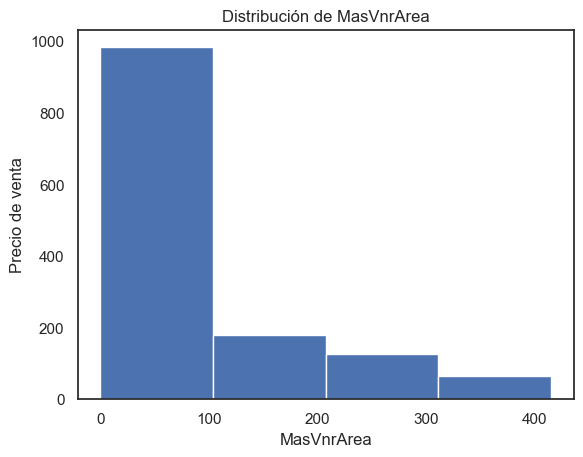

In [50]:
plt.hist(df_train_filtrado['MasVnrArea'], bins=4)
plt.xlabel('MasVnrArea')
plt.ylabel('Precio de venta')
plt.title('Distribución de MasVnrArea')

In [51]:
columna = 'GarageYrBlt'

# Calcular el rango intercuartílico (IQR)
Q1 = df_train[columna].quantile(0.25)
Q3 = df_train[columna].quantile(0.75)
IQR = Q3 - Q1

# Definir el rango para identificar outliers
umbral_inferior = Q1 - 1.5 * IQR
umbral_superior = Q3 + 1.5 * IQR

# Filtrar los datos sin outliers
df_train_filtrado = df_train[(df_train[columna] >= umbral_inferior) & (df_train[columna] <= umbral_superior)]

In [52]:
df_train_filtrado['GarageYrBlt']= df_train_filtrado['GarageYrBlt'].fillna(df_train_filtrado['GarageYrBlt'].mode())

Text(0.5, 1.0, 'Distribución de Precio de Venta por año de GarageYrBlt')

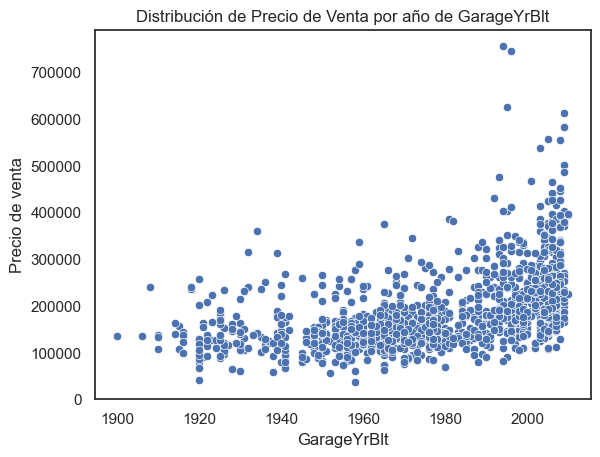

In [53]:
sns.scatterplot(x=df_train_filtrado['GarageYrBlt'], y=df_train_filtrado.SalePrice)
plt.xlabel('GarageYrBlt')
plt.ylabel('Precio de venta')
plt.title('Distribución de Precio de Venta por año de GarageYrBlt')

Text(0.5, 1.0, 'Distribución de GarageYrBlt')

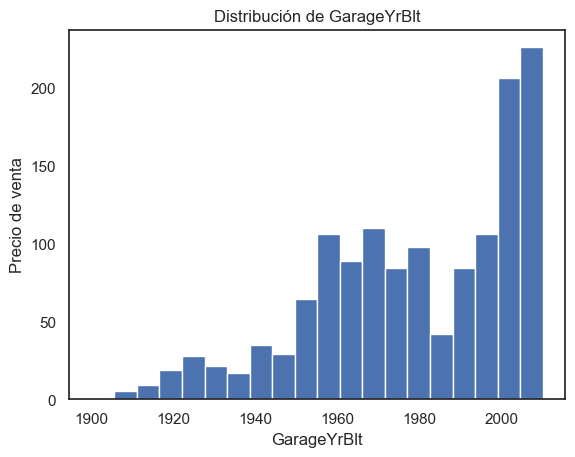

In [54]:
plt.hist(df_train_filtrado['GarageYrBlt'], bins=20)
plt.xlabel('GarageYrBlt')
plt.ylabel('Precio de venta')
plt.title('Distribución de GarageYrBlt')

In [55]:
columnas_categoricas = df_train.select_dtypes(include=['object']).columns.tolist()
print(columnas_categoricas)

['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']


In [56]:
df_train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [57]:
df_ordinal = df_train.copy()

In [58]:
for i in columnas_categoricas:
    df_ordinal[i] = df_ordinal[i].fillna(df_ordinal[i].mode()[0])
    df_ordinal[i] = df_ordinal[i].astype('category').cat.codes + 1
    df_ordinal

In [59]:
# Encuentra las columnas a eliminar
columns_to_drop = df_ordinal.columns.difference(columnas_categoricas)

# Elimina las columnas del dataframe
df_ordinal = df_ordinal.drop(columns_to_drop, axis=1)
df_ordinal['SalePrice']= df_train['SalePrice']

df_ordinal


,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition,SalePrice
0,4,2,1,4,4,1,5,1,6,3,...,3,5,5,3,3,3,3,9,5,208500
1,4,2,1,4,4,1,3,1,25,2,...,3,5,5,3,3,3,3,9,5,181500
2,4,2,1,1,4,1,5,1,6,3,...,3,5,5,3,3,3,3,9,5,223500
3,4,2,1,1,4,1,1,1,7,3,...,4,5,5,3,3,3,3,9,1,140000
4,4,2,1,1,4,1,3,1,16,3,...,3,5,5,3,3,3,3,9,5,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,4,2,1,4,4,1,5,1,9,3,...,3,5,5,3,3,3,3,9,5,175000
1456,4,2,1,4,4,1,5,1,15,3,...,4,5,5,3,3,3,3,9,5,210000
1457,4,2,1,4,4,1,5,1,7,3,...,3,5,5,3,3,1,3,9,5,266500
1458,4,2,1,4,4,1,5,1,13,3,...,4,5,5,3,3,3,3,9,5,142125


In [60]:
#código de Guido
mask = np.zeros_like(df_ordinal.corr(numeric_only=True))
triangle_indices = np.triu_indices_from(mask)
mask[triangle_indices] = True

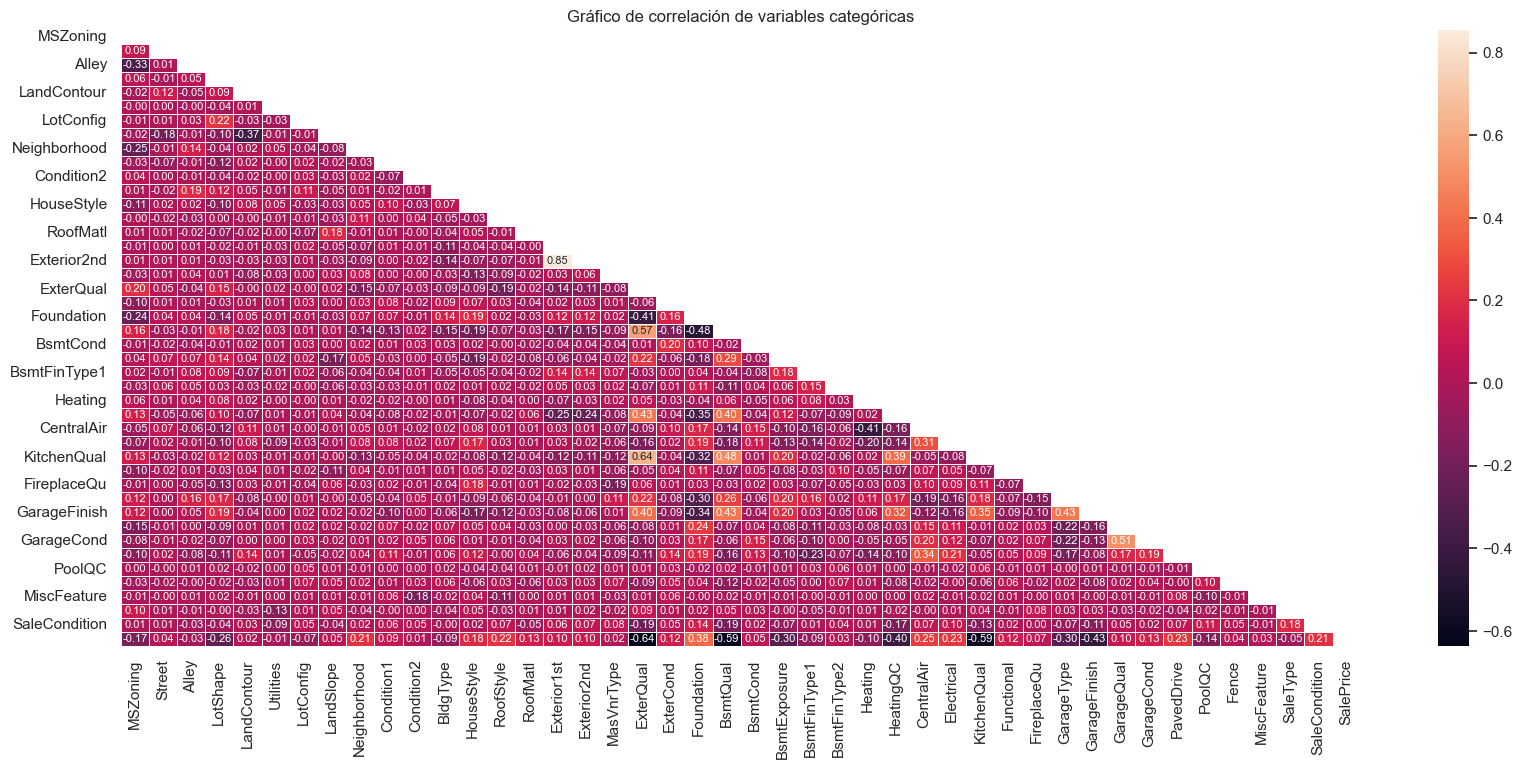

In [61]:
#código de Guido para correlación de variables númericas
f, ax = plt.subplots(figsize=(20,8))
sns.heatmap(df_ordinal.corr(numeric_only=True), annot = True, annot_kws = {"size": 8}, mask = mask,  linewidth=0.4, fmt='.2f', ax=ax)
sns.set_style('white')
plt.title('Gráfico de correlación de variables categóricas')
#plt.savefig('Heatmap todas.svg', dpi = 150)
plt.show()

Text(0.5, 1.0, 'Distribución de Precio de Venta por cantidad de ExterQual')

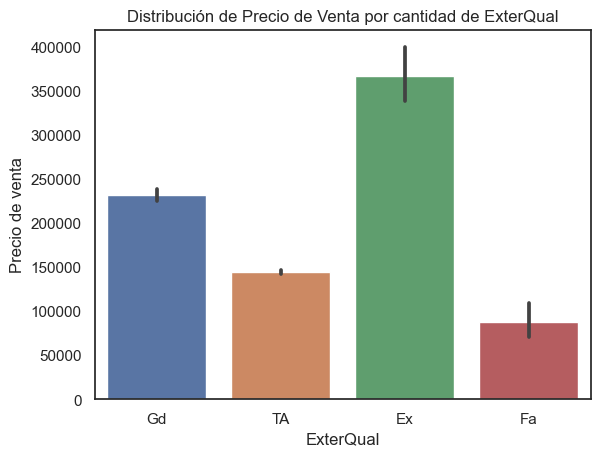

In [63]:
sns.barplot(x=df_train.ExterQual, y=df_train_limpio.SalePrice)
plt.xlabel('ExterQual')
plt.ylabel('Precio de venta')
plt.title('Distribución de Precio de Venta por cantidad de ExterQual')

Text(0.5, 1.0, 'Frecuencia de cantidad de ExterQual')

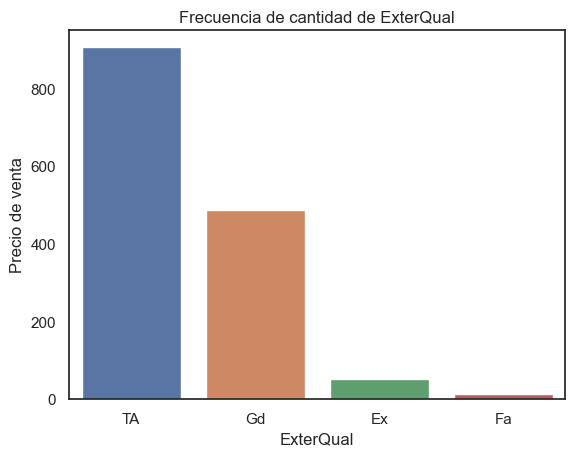

In [83]:
sns.barplot(x=df_train.ExterQual.value_counts().index, y= df_ordinal.ExterQual.value_counts().values)
plt.xlabel('ExterQual')
plt.ylabel('Precio de venta')
plt.title('Frecuencia de cantidad de ExterQual')

ExterQual nos deja en claro que claramente en un mejor estado (Excelente) mayor valor, pero así también es poca la frecuencia en la que se encuentran dichos tipos de propiedades.

Text(0.5, 1.0, 'Distribución de Precio de Venta por cantidad de KitchenQual')

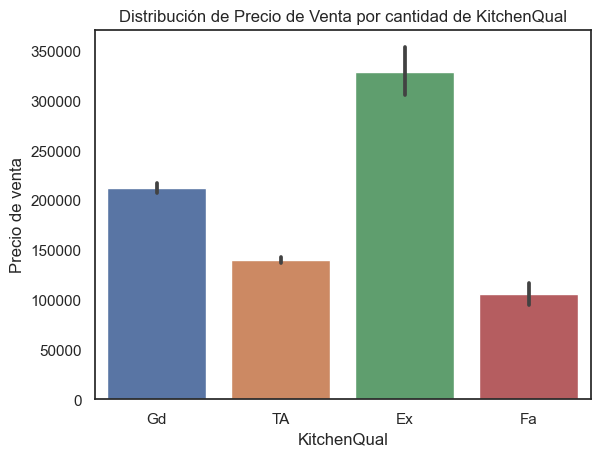

In [104]:
sns.barplot(x=df_train.KitchenQual, y=df_train_limpio.SalePrice)
plt.xlabel('KitchenQual')
plt.ylabel('Precio de venta')
plt.title('Distribución de Precio de Venta por cantidad de KitchenQual')

Sucede de la misma manera con KitchenQual

Text(0.5, 1.0, 'Distribución de Precio de Venta por cantidad de KitchenQual')

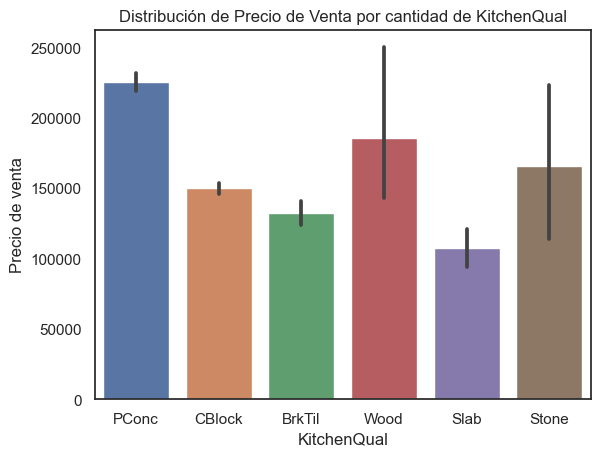

In [122]:
sns.barplot(x=df_train.Foundation, y=df_train_limpio.SalePrice)
plt.xlabel('KitchenQual')
plt.ylabel('Precio de venta')
plt.title('Distribución de Precio de Venta por cantidad de KitchenQual')

In [84]:
from scipy.stats import pearsonr

# Reemplaza 'df_train' con el nombre de tu dataframe
categorical_columns = df_train.select_dtypes(include=['object']).columns.tolist()

# Crea un nuevo dataframe para las variables codificadas ordinalmente
ordinal_df = pd.DataFrame()

for column in categorical_columns:
    # Rellena los valores faltantes con la moda
    filled_column = df_train[column].fillna(df_train[column].mode()[0])
    
    # Asigna valores numéricos ordinalmente
    ordinal_df[column] = filled_column.astype('category').cat.codes + 1

# Calcula la correlación entre las variables codificadas y la variable objetivo
correlations = []
for column in ordinal_df.columns:
    corr, _ = pearsonr(ordinal_df[column], df_train['SalePrice'])
    correlations.append((column, corr))

# Ordena las correlaciones de mayor a menor
correlations.sort(key=lambda x: abs(x[1]), reverse=True)



In [130]:
columns = ['LotArea', 'GrLivArea', 'Foundation', 'ExterQual', 'KitchenQual','LotFrontage', 'Utilities', 'MasVnrArea', 'GarageYrBlt', 'BsmtQual', 'GarageFinish', 'MSZoning', 'OverallQual', 'YearRemodAdd', 'Neighborhood','SalePrice'] 
df_filtered = df_train[columns]

In [131]:
df_filtered.head()

,LotArea,GrLivArea,Foundation,ExterQual,KitchenQual,LotFrontage,Utilities,MasVnrArea,GarageYrBlt,BsmtQual,GarageFinish,MSZoning,OverallQual,YearRemodAdd,Neighborhood,SalePrice
0,8450,1710,PConc,Gd,Gd,65.0,AllPub,196.0,2003.0,Gd,RFn,RL,7,2003,CollgCr,208500
1,9600,1262,CBlock,TA,TA,80.0,AllPub,0.0,1976.0,Gd,RFn,RL,6,1976,Veenker,181500
2,11250,1786,PConc,Gd,Gd,68.0,AllPub,162.0,2001.0,Gd,RFn,RL,7,2002,CollgCr,223500
3,9550,1717,BrkTil,TA,Gd,60.0,AllPub,0.0,1998.0,TA,Unf,RL,7,1970,Crawfor,140000
4,14260,2198,PConc,Gd,Gd,84.0,AllPub,350.0,2000.0,Gd,RFn,RL,8,2000,NoRidge,250000


In [132]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

In [133]:
df_filtered['MSZoning'] = df_filtered['MSZoning'] .replace('C (all)', 'C')
df_filtered['MSZoning'].unique()

array(['RL', 'RM', 'C', 'FV', 'RH'], dtype=object)

In [134]:
df_filtered["MSZoning_encoded"]= label_encoder.fit_transform(df_filtered["MSZoning"])
df_filtered["BsmtQual_encoded"]= label_encoder.fit_transform(df_filtered["BsmtQual"])
df_filtered["GarageFinish_encoded"]= label_encoder.fit_transform(df_filtered["GarageFinish"])
df_filtered["Neighborhood_encoded"]= label_encoder.fit_transform(df_filtered["Neighborhood"])
df_filtered["ExterQual_encoded"]= label_encoder.fit_transform(df_filtered["ExterQual"])
df_filtered['KitchenQual_encoded'] = label_encoder.fit_transform(df_filtered['KitchenQual'])
df_filtered['Foundation_encoded'] = label_encoder.fit_transform(df_filtered['Foundation'])

In [135]:
df_filtered.drop('MSZoning',axis=1, inplace=True)
df_filtered.drop('Utilities',axis=1, inplace=True)
df_filtered.drop('GarageFinish',axis=1, inplace=True)
df_filtered.drop('Neighborhood',axis=1, inplace=True)
df_filtered.drop('BsmtQual',axis=1, inplace=True)
df_filtered.drop('ExterQual',axis=1, inplace=True)
df_filtered.drop('KitchenQual',axis=1, inplace=True)
df_filtered.drop('Foundation',axis=1, inplace=True)

In [136]:
moda= df_filtered['GarageYrBlt'].mode()
df_filtered['GarageYrBlt'] = df_filtered['GarageYrBlt'].fillna(moda.loc[0])


In [137]:
moda= df_filtered['MasVnrArea'].mode()
df_filtered['MasVnrArea'] = df_filtered['MasVnrArea'].fillna(moda.loc[0])

In [138]:
df_filtered.isna().sum()

LotArea                 0
GrLivArea               0
LotFrontage             0
MasVnrArea              0
GarageYrBlt             0
OverallQual             0
YearRemodAdd            0
SalePrice               0
MSZoning_encoded        0
BsmtQual_encoded        0
GarageFinish_encoded    0
Neighborhood_encoded    0
ExterQual_encoded       0
KitchenQual_encoded     0
Foundation_encoded      0
dtype: int64

### Luego del análisis exploratorio y de haber seleccionado nuestras features, pasamos a hacer fit y selección de modelos

In [159]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X= df_filtered.drop(["SalePrice"],axis=1)
y= df_filtered["SalePrice"]

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)



#### Modelo 1: LinearRegression

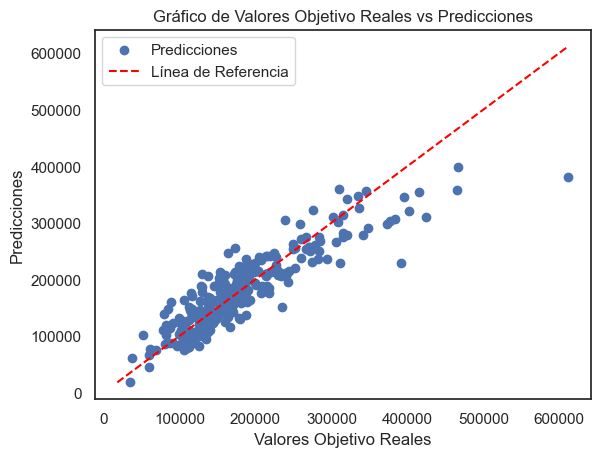

El RMSE es 35741.37 
El R2: 0.8003048264672457


In [179]:
from sklearn.metrics import mean_squared_error, r2_score, mean_squared_error
regr = LinearRegression()
regr.fit(X_train, y_train)
y_pred= regr.predict(X_test)

# Crear un rango de valores para la línea de referencia
min_val = min(np.min(y_test), np.min(y_pred))
max_val = max(np.max(y_test), np.max(y_pred))
ref_line = np.linspace(min_val, max_val, 100)

# Graficar los valores objetivo reales y las predicciones
plt.scatter(y_test, y_pred, label='Predicciones')
plt.plot(ref_line, ref_line, color='red', linestyle='--', label='Línea de Referencia')
plt.xlabel('Valores Objetivo Reales')
plt.ylabel('Predicciones')
plt.title('Gráfico de Valores Objetivo Reales vs Predicciones')
plt.legend()
plt.show()

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mse)

print("El RMSE es", round(rmse,2),'\nEl R2:',r2)


#### Modelo 2: RandomForestRegressor

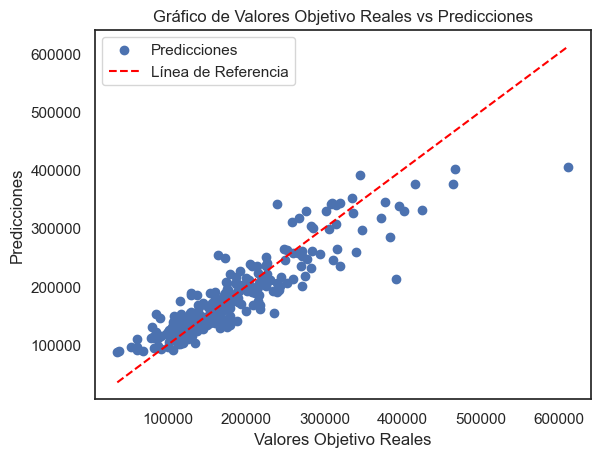

El RMSE es 33713.84 
El R2: 0.8223187445102149


In [178]:
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

# Crear una instancia del modelo Random Forest
rf_model = RandomForestRegressor(n_estimators=100, max_depth= 50, min_samples_split=20, min_samples_leaf=10, max_features= 8, random_state=123)

# Ajustar el modelo a los datos de entrenamiento
rf_model.fit(X_train, y_train)

# Realizar predicciones en los datos de prueba
y_pred = rf_model.predict(X_test)

# Crear un rango de valores para la línea de referencia
min_val = min(np.min(y_test), np.min(y_pred))
max_val = max(np.max(y_test), np.max(y_pred))
ref_line = np.linspace(min_val, max_val, 100)

# Graficar los valores objetivo reales y las predicciones
plt.scatter(y_test, y_pred, label='Predicciones')
plt.plot(ref_line, ref_line, color='red', linestyle='--', label='Línea de Referencia')
plt.xlabel('Valores Objetivo Reales')
plt.ylabel('Predicciones')
plt.title('Gráfico de Valores Objetivo Reales vs Predicciones')
plt.legend()
plt.show()

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mse)
print("El RMSE es", round(rmse,2),'\nEl R2:',r2)


#### Modelo 3: RandomForestRegressor

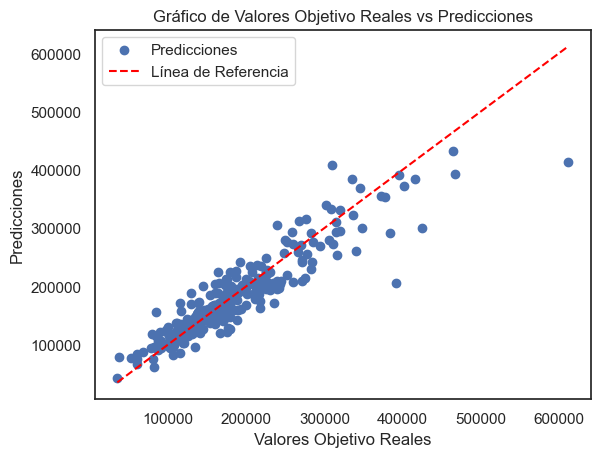

El RMSE es 31301.9 
El R2: 0.8468325035327998


In [195]:
from sklearn.ensemble import GradientBoostingRegressor

gbrt=GradientBoostingRegressor(loss='squared_error',learning_rate=0.2, n_estimators=50, subsample=0.8,max_depth=4,criterion='squared_error',
                               random_state=123)

#Fiteamos el modelo
gbrt_model = gbrt.fit(X_train, y_train)

# Realizar predicciones en los datos de prueba
y_pred = gbrt_model.predict(X_test)

# Crear un rango de valores para la línea de referencia
min_val = min(np.min(y_test), np.min(y_pred))
max_val = max(np.max(y_test), np.max(y_pred))
ref_line = np.linspace(min_val, max_val, 100)

# Graficar los valores objetivo reales y las predicciones
plt.scatter(y_test, y_pred, label='Predicciones')
plt.plot(ref_line, ref_line, color='red', linestyle='--', label='Línea de Referencia')
plt.xlabel('Valores Objetivo Reales')
plt.ylabel('Predicciones')
plt.title('Gráfico de Valores Objetivo Reales vs Predicciones')
plt.legend()
plt.show()

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mse)
print("El RMSE es", round(rmse,2),'\nEl R2:',r2)


#### Model 4: LightGBM

In [203]:
import lightgbm as lgb #pip install lightgbm
clf = lgb.LGBMRegressor(boosting_type='gbdt',max_depth=4,num_leaves=20,learning_rate=0.01,n_estimators=100)
clf.fit(X_train, y_train)
y_pred=clf.predict(X_test)

In [204]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mse)
print("El RMSE es", round(rmse,2),'\nEl R2:',r2)

El RMSE es 47092.68 
El R2: 0.653317379470713


In [205]:
import pandas as pd
import xgboost as xgb
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
regressor = xgb.XGBRegressor(
    n_estimators=100,
    reg_lambda=1,
    gamma=0,
    max_depth=3
)

In [206]:
#Fiteamos
regressor.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.300000012, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=3, max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [207]:
#Predecimos
y_pred = regressor.predict(X_test)

In [208]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mse)
print("El RMSE es", round(rmse,2),'\nEl R2:',r2)

El RMSE es 31220.63 
El R2: 0.8476268402004701
